In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset insurance
data = pd.read_excel('insurance_data.xlsx')

In [3]:
data.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [5]:
data.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

<AxesSubplot: >

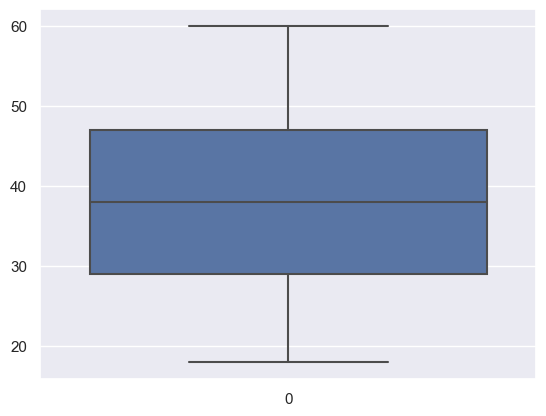

In [6]:
# handling missing values : - age (float), region (object)
# -------> age column
sns.boxplot(data['age'])

In [7]:
#age has no outlier present hence we use mean for treating missing values
data['age'] = data['age'].fillna(data['age'].mean())

In [8]:
#-------> region column
data['region'].value_counts()


southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

In [9]:
# label encoding
from sklearn.preprocessing import LabelEncoder
x_label = LabelEncoder()
data['region']=x_label.fit_transform(data['region'])

In [10]:
data['region'] = data['region'].fillna(data['region'].mode())

<AxesSubplot: >

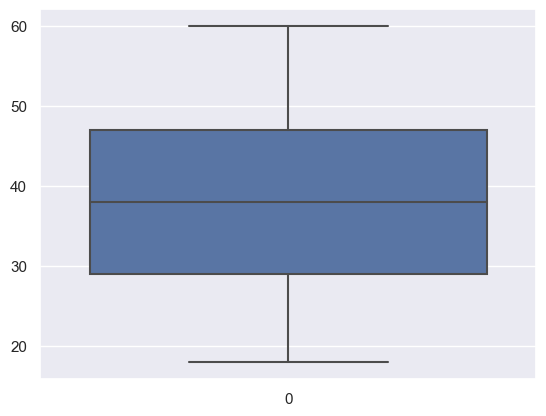

In [11]:
sns.boxplot(data['age'])

In [12]:
# checking for null values
data.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

<AxesSubplot: xlabel='age', ylabel='Density'>

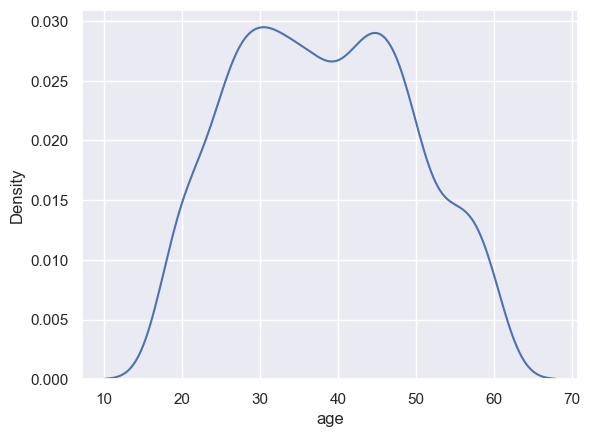

In [13]:
sns.kdeplot(data['age'], label = 'KDE')

In [14]:
data['age'].describe()

count    1340.000000
mean       38.078652
std        11.082175
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

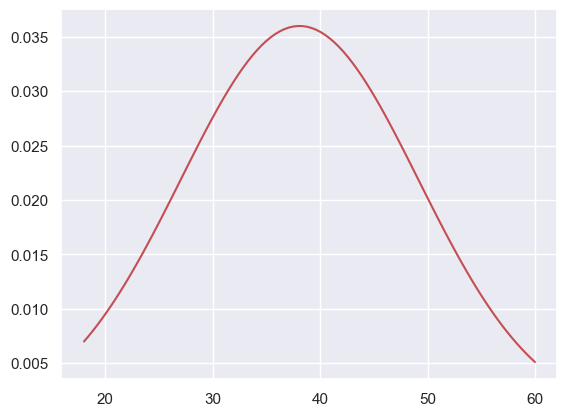

In [15]:
from scipy.stats import norm
mu = 38.078652
sd = 11.082175
xmin = 18.000000
xmax = 60.000000
x = np.linspace(xmin, xmax, 100 )
p = norm.pdf(x,mu,sd)
plt.plot(x,p,'r',label='Normal distribution of age')

### Q-2: What is the probability of a patient having a BMI greater than 30?

In [16]:
data['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [17]:
mu = 30.668955
sd = 6.106735
prob_greater_30 = 1 - norm.cdf(30,mu,sd)
print('The probability of a patient having a BMI greater than 30 is: ',prob_greater_30 )

The probability of a patient having a BMI greater than 30 is:  0.5436144110621477


### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

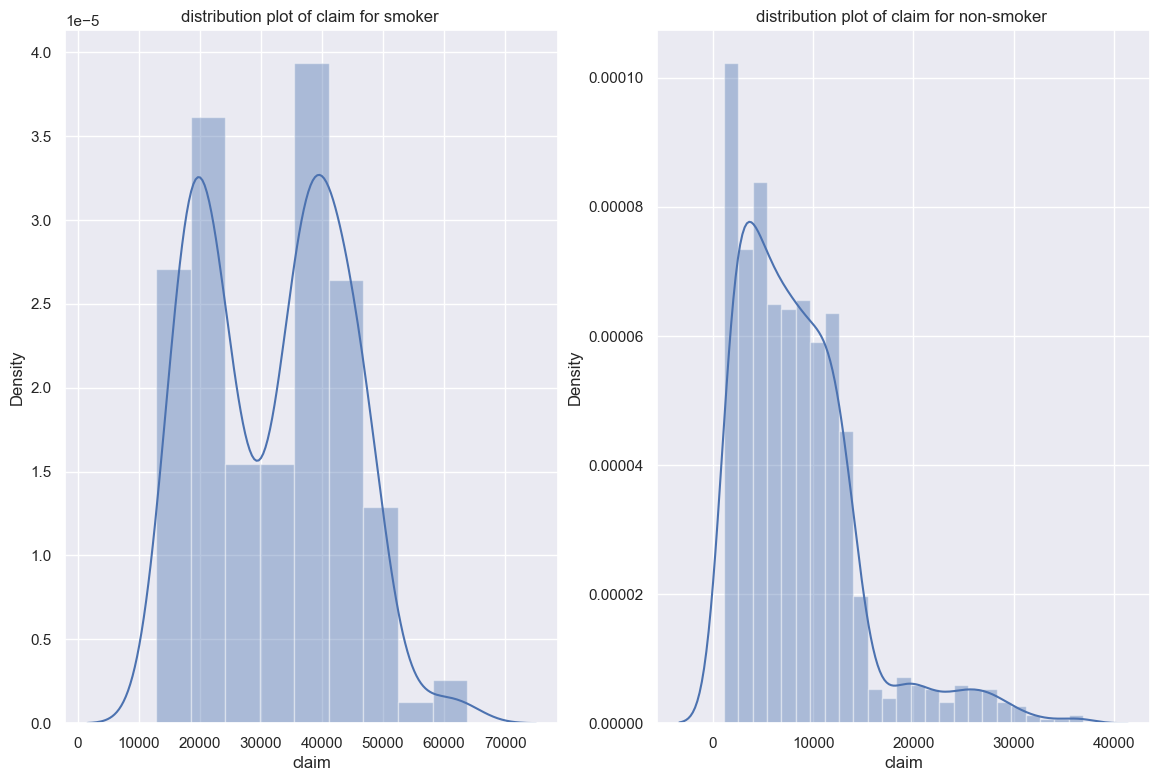

In [18]:
plt.figure(figsize=(14,9))
plt.subplot(121)
sns.distplot(data[data['smoker']=='Yes']['claim'])
plt.title('distribution plot of claim for smoker ')

plt.subplot(122)
sns.distplot(data[data['smoker']=='No']['claim'])
plt.title('distribution plot of claim for non-smoker ')

plt.show()

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

<AxesSubplot: xlabel='age', ylabel='claim'>

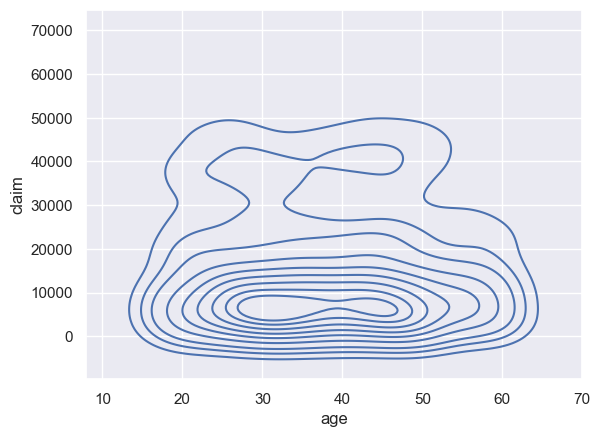

In [21]:
sns.kdeplot(data=data, x = 'age', y='claim')

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<AxesSubplot: xlabel='region', ylabel='age'>

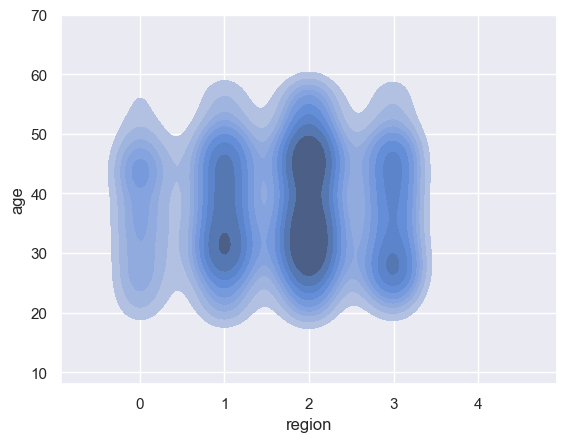

In [25]:
sns.kdeplot(data=data,x='region',y='age',fill=True,thresh=0.15)

### Q6: Plot PDF and CDF of claim in insurance data

<AxesSubplot: xlabel='claim', ylabel='Count'>

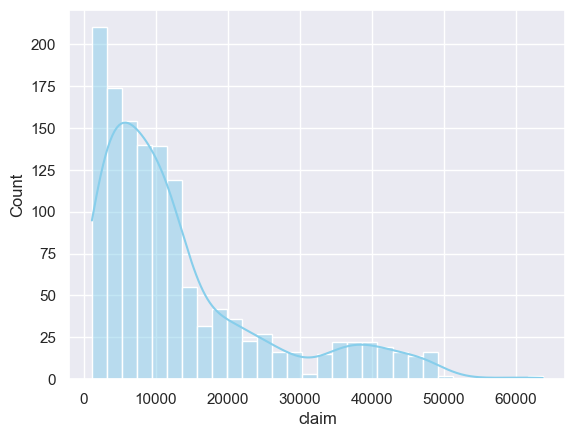

In [26]:
sns.histplot(data=data['claim'],kde=True,color='skyblue')

### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

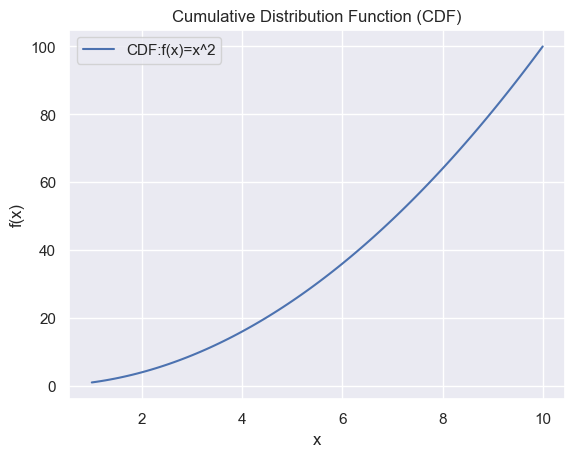

In [30]:
def cdf(x):
    return x**2
x_value = np.linspace(1,10,100)
y_value= cdf(x_value)
plt.plot(x_value,y_value,label='CDF:f(x)=x^2')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()
plt.grid(True)
plt.show()

### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

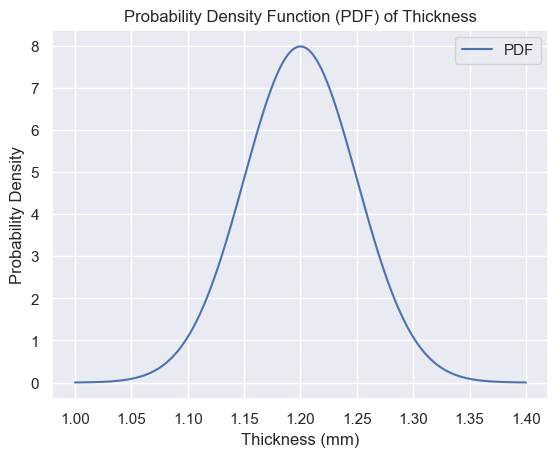

In [31]:
x_bar = 1.2
std_dev=0.05
thickness_func = norm(x_bar,std_dev)
x_value = np.linspace(1.0,1.4,1000)
plt.plot(x_value,thickness_func.pdf(x_value),label='PDF')
plt.xlabel('Thickness (mm)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) of Thickness')
plt.legend()
plt.grid(True)
plt.show()



### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

### `Q.10`. Given a normal distribution with mean as 50 and deviation as 10, answer below questions

(X ~ N(5O, 10) ):

    a. what are the values of the mean and standard deviation?
    
    b. What value of x has a z-score of 1.4?

    c. What is the Z-score that corresponds to x = 30?

    d. What is the difference between positive and negative z values?

### `Q.11:`The average test score in a certain statistics class was 74 with a standard deviation of 8. There are 2000 students in this class. Use the emperical rule to answer the following questions:
    (a) What percentage of students scored less than 58?
    (b) What is the probability that a student score between 66 and 82 on the exam?
    (c) How many students scored at most 90?
    (d) What percentage of students scored at least 66?
    (e) How many students scored more than 98 on the test?


### `Q-12:` Normally distributed IQ scores have a mean of 100 and a standard deviation of 15. Use the standard z-table to answer the following questions:

What is the probability of randomly selecting someone with an IQ score that is

    (a) less than 80?
    (b) greater than 136?
    (c) between 95 and 110?
    (d) What IQ score corresponds to the 90th percentile?
    (e) The middle 30% of IQs fall between what two values?